In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import accuracy
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Item - Item collaborative filtering with Matrix factorization

## SVD with surprise library

#### Load google drive and define base path

In [3]:
Base_path ='/content/drive/MyDrive/Data/RS2'

In [4]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load Filtered data and applying operations using surprise library

In [20]:
# Load dataset
data = pd.read_csv(Base_path+"/short-recipes-20.csv")

In [21]:
# Define the reader object
reader = Reader(rating_scale=(1, 5))

In [22]:
# Load the dataset into Surprise format
data = Dataset.load_from_df(data[['user_id', 'recipe_id', 'rating']], reader)

In [23]:
# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

In [24]:
# Define the item-item similarity options
sim_options = {'name': 'cosine', 'user_based': False}

# Define the SVD model with item-item similarity
model = SVD(biased='False')

In [25]:
# Train the model on the training set
model.fit(trainset)

In [26]:
# Make predictions on the test set
predictions = model.test(testset)

In [27]:
type(predictions)

list

In [28]:
predictions[0]

Prediction(uid=107135, iid=416397, r_ui=5.0, est=4.714509680937896, details={'was_impossible': False})

In [29]:
predictions[0][1]

416397

#### Different Performance Measure

##### RMSE

In [30]:
# Compute and print the RMSE score
rmse = accuracy.rmse(predictions)

RMSE: 0.7744


##### Precision,Recall,F1 score

In [31]:
# Compute precision, recall, and F1-score
tp = 0  # true positives
fp = 0  # false positives
fn = 0  # false negatives
for uid, iid, r_ui, est, _ in predictions:
    if est >= 3.5 and r_ui >= 3.5:
        tp += 1
    elif est >= 3.5 and r_ui < 3.5:
        fp += 1
    elif est < 3.5 and r_ui >= 3.5:
        fn += 1

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Precision: 0.9504812615195577
Recall: 0.9972496776966051
F1-score: 0.9733039739960155


#### Recommendation

In [32]:
# Use the trained model to recommend recipes for a given user
user_id = 1533

In [33]:
# Get a list of all recipe IDs
recipe_ids = data.df['recipe_id'].unique()

In [34]:
# Create a list of tuples with the recipe ID and its estimated rating
predictions = [(recipe_id, model.predict(user_id, recipe_id).est) for recipe_id in recipe_ids]

In [35]:
# Sort the list in descending order by the estimated rating
predictions.sort(key=lambda x: x[1], reverse=True)

In [ ]:
recipes = pd.read_csv(Base_path+'/RAW_recipes.csv')
recipes.head()

In [37]:
# Print the top 10 recommended recipes with their metadata
print("Your Top 10 recommendations")
for recipe_id, rating in predictions[:10]:
    recipe = recipes[recipes['id'] == recipe_id]
    print()
    print(f"Recipe Name: {recipe['name'].values[0]}")
    print(f"It will take Minutes to prepare: {recipe['minutes'].values[0]}")
    print(f"Ingredients: {recipe['ingredients'].values[0]}")
    print()

Your Top 10 recommendations

Recipe Name: 4th of july grilled salmon  or chicken
It will take Minutes to prepare: 15
Ingredients: ['salmon steaks', 'peanut oil', 'soy sauce', 'balsamic vinegar', 'onion', 'brown sugar', 'garlic cloves', 'fresh ginger', 'crushed red pepper flakes', 'sesame oil', 'salt']


Recipe Name: 7 30 salad
It will take Minutes to prepare: 15
Ingredients: ['romaine lettuce hearts', 'baby spinach', 'hearts of palm', 'cucumber', 'carrot', 'tomatoes', 'red onion', 'frozen green pea', 'capers']


Recipe Name: a faster egg muffin
It will take Minutes to prepare: 2
Ingredients: ['english muffin', 'egg', 'deli ham', 'cheese']


Recipe Name: afternoon pick me up
It will take Minutes to prepare: 2
Ingredients: ['vegetable juice cocktail', 'balsamic vinegar', 'garlic powder', 'hot sauce']


Recipe Name: an italian tuna sandwich
It will take Minutes to prepare: 15
Ingredients: ['hamburger buns with sesame seeds', 'mixed salad green', 'lemon, juice of', 'tuna in vegetable oil',

#### compare RMSE value for different value of K(RecommRecommendation)

In [61]:
# Define the range of number of recommendations to try
n_recommendations = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Compute the accuracy metrics for different number of recommendations
rmse_scores = []
mae_scores = []
for n in n_recommendations:
    # Train the model on the training set
    model.fit(trainset)
    # Make predictions on the test set for n recommendations
    predictions = model.test(testset[:n])
    # Compute and append the RMSE and MAE scores
    rmse_scores.append(accuracy.rmse(predictions, verbose=False))
    mae_scores.append(accuracy.mae(predictions, verbose=False))


[Prediction(uid=275742, iid=156132, r_ui=5.0, est=4.930181547183327, details={'was_impossible': False}), Prediction(uid=89831, iid=37640, r_ui=5.0, est=5, details={'was_impossible': False}), Prediction(uid=41578, iid=32170, r_ui=5.0, est=5, details={'was_impossible': False}), Prediction(uid=37779, iid=302815, r_ui=5.0, est=4.613014652939386, details={'was_impossible': False}), Prediction(uid=95743, iid=92208, r_ui=5.0, est=4.494526387345404, details={'was_impossible': False})]
[Prediction(uid=275742, iid=156132, r_ui=5.0, est=4.9561871212069315, details={'was_impossible': False}), Prediction(uid=89831, iid=37640, r_ui=5.0, est=4.960692724941203, details={'was_impossible': False}), Prediction(uid=41578, iid=32170, r_ui=5.0, est=5, details={'was_impossible': False}), Prediction(uid=37779, iid=302815, r_ui=5.0, est=4.6157677133506505, details={'was_impossible': False}), Prediction(uid=95743, iid=92208, r_ui=5.0, est=4.693199328574508, details={'was_impossible': False}), Prediction(uid=498

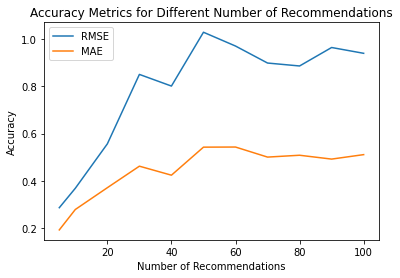

In [62]:
# Plot the RMSE and MAE scores against the number of recommendations
plt.plot(n_recommendations, rmse_scores, label='RMSE')
plt.plot(n_recommendations, mae_scores, label='MAE')
plt.title('Accuracy Metrics for Different Number of Recommendations')
plt.xlabel('Number of Recommendations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()